<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

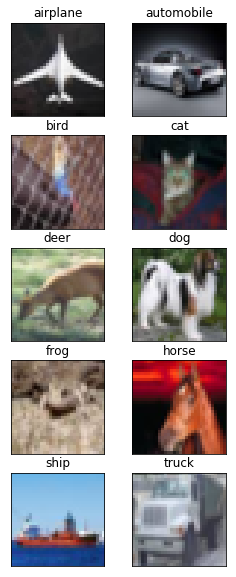

In [14]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(4,10))
for i in range(num_classes):
    ax = fig.add_subplot(5, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

![alt text](https://2.bp.blogspot.com/-HQo2Kx39Q6A/WsqZQn5pJHI/AAAAAAAAVhY/FBkgOeS06vQNvZN2KI2hhGZmfS1cNPg8wCLcBGAs/s1600/enasdiscoverednetwork.png)

In [18]:
#For Reference

"""
sep 5 = conv_3 , conv_2, sep_1, sep_2, sep_3, sep_4

maxP =  sep_4, sep_3, spe_2, sep_1,  sep_5

conv_4 = conv_3, max_2

sep 6 = sep_2,  sep_4, conv_1, conv_4

conv_5 = conv_4, conv_2, conv_1, sep_3, sep_6

sep_7 = conv_2, sep_4, sep_6, sep_2, sep_3, sep_1, conv_5

softmax = sep_4, sep_6, sep_2, sep_7

"""

'\nsep 5 = conv_3 , conv_2, sep_1, sep_2, sep_3, sep_4\n\nmaxP =  sep_4, sep_3, spe_2, sep_1,  sep_5\n\nconv_4 = conv_3, max_2\n\nsep 6 = sep_2,  sep_4, conv_1, conv_4\n\nconv_5 = conv_4, conv_2, conv_1, sep_3, sep_6\n\nsep_7 = conv_2, sep_4, sep_6, sep_2, sep_3, sep_1, conv_5\n\nsoftmax = sep_4, sep_6, sep_2, sep_7\n\n'

In [0]:
import tensorflow as tf
def space_to_depth(x):
    return tf.space_to_depth(x, block_size=2)

In [23]:
from keras import layers, Model, Input
from keras.layers import Lambda, GlobalAveragePooling2D, ReLU

inputs = Input(shape=(32, 32, 3))

#layer 1
sep_1 = layers.SeparableConv2D(32, 5, 5, border_mode= 'same')(inputs)
sep_1 = ReLU()(sep_1)
sep_1 = BatchNormalization()(sep_1)
#32

#layer 2
conv_1 =  layers.Conv2D(64, 5 , 5, border_mode= 'same')(sep_1)
conv_1 = ReLU()(conv_1)
conv_1 = BatchNormalization()(conv_1)
#32

#layer3
conv_2 =  layers.Conv2D(32, 5 , 5, border_mode= 'same')(conv_1)
conv_2 = ReLU()(conv_2)
conv_2 = BatchNormalization()(conv_2)
#32

#skip connection 1
skip_1 = layers.concatenate([sep_1, conv_2])
#32

#layer 4
sep_2 = layers.SeparableConv2D(32, 5, 5, border_mode= 'same')(skip_1)
sep_2 = ReLU()(sep_2)
sep_2 = BatchNormalization()(sep_2)
#32

#skip_connection 2
skip_2 = layers.concatenate([sep_1, sep_2])
#32

#layer 5
max_1 = layers.MaxPooling2D(pool_size=(2, 2))(skip_2)
#16

#layer 6
sep_3 = layers.SeparableConv2D(128, 3, 3, border_mode= 'same')(max_1)
sep_3 = ReLU()(sep_3)
sep_3 = BatchNormalization()(sep_3)
sep_1 = Lambda(space_to_depth)(sep_1)
sep_2 = Lambda(space_to_depth)(sep_2)
#16

#skip connection 3
skip_3 = layers.concatenate([sep_1, sep_2, sep_3])
#16

#layer 7
conv_3 = layers.Conv2D(32, 5 , 5, border_mode= 'same')(skip_3)
conv_3 = ReLU()(conv_3)
conv_3 = BatchNormalization()(conv_3)
#16

#skip connection 4
conv_2 = Lambda(space_to_depth)(conv_2)
#16

skip_4 = layers.concatenate([sep_2, conv_3, conv_2, sep_3])
#16

#layer 8
sep_4 = layers.SeparableConv2D(32 , 3, 3, border_mode= 'same')(skip_4)
sep_4 = ReLU()(sep_4)
sep_4 = BatchNormalization()(sep_4)
#16

#sep 5 = conv_3 , conv_2, sep_1, sep_2, sep_3, sep_4
#skip connection 5
skip_5 = layers.concatenate([conv_3 , conv_2, sep_1, sep_2, sep_3, sep_4])
#16

sep_5 = layers.SeparableConv2D(32 , 5, 5, border_mode= 'same')(skip_5)
sep_5 = ReLU()(sep_5)
sep_5 = BatchNormalization()(sep_5)
#16

#maxP =  sep_4, sep_3, sep_2, sep_1,  sep_5
#skip connection 6
skip_6 = layers.concatenate([sep_4, sep_3, sep_2, sep_1,  sep_5])
#16

max_2 = layers.MaxPooling2D(pool_size=(2, 2))(skip_6)
#8


#conv_4 = conv_3, max_2
#skip connection 7
conv_3 = Lambda(space_to_depth)(conv_3)
#8

skip_7 = layers.concatenate([conv_3, max_2])
#8

conv_4 = layers.Conv2D(32, 5 , 5, border_mode= 'same')(skip_7)
conv_4 = ReLU()(conv_4)
conv_4 = BatchNormalization()(conv_4)
#8

#sep 6 = sep_2,  sep_4, conv_1, conv_4
#skip connection 8
sep_2 = Lambda(space_to_depth)(sep_2)
sep_4 = Lambda(space_to_depth)(sep_4)
conv_1 = Lambda(space_to_depth)(conv_1)
conv_1 = Lambda(space_to_depth)(conv_1)
#8

skip_8 = layers.concatenate([sep_2,  sep_4, conv_1, conv_4])
#8
sep_6 = layers.SeparableConv2D(32 , 5, 5, border_mode= 'same')(skip_8)
sep_6 = ReLU()(sep_6)
sep_6 = BatchNormalization()(sep_6)
#8

#conv_5 = conv_4, conv_2, conv_1, sep_3, sep_6
#skip connection 9
conv_2 = Lambda(space_to_depth)(conv_2)
sep_3 = Lambda(space_to_depth)(sep_3)
#8

skip_9 = layers.concatenate([conv_4, conv_2, conv_1, sep_3, sep_6])
#8

conv_5 = layers.Conv2D(32, 3 , 3, border_mode='same')(skip_9)
conv_5 = ReLU()(conv_5)
conv_5 = BatchNormalization()(conv_5)
#8

#sep_7 = conv_2, sep_4, sep_6, sep_2, sep_3, sep_1, conv_5
#skip connection 10
sep_1 = Lambda(space_to_depth)(sep_1)
#8

skip_10 = layers.concatenate([conv_2, sep_4, sep_6, sep_2, sep_3, sep_1, conv_5])
#8

sep_7 = layers.SeparableConv2D(32 , 5, 5, border_mode= 'same')(skip_10)
sep_7 = ReLU()(sep_7)
sep_7 = BatchNormalization()(sep_7)
#8

#softmax = sep_4, sep_6, sep_2, sep_7
#skip connection 11
skip_11 = layers.concatenate([sep_4, sep_6, sep_2, sep_7])
#8

point = layers.Conv2D(10, 1, 1)(skip_11)
GAP =  GlobalAveragePooling2D()(point)
#10

output = layers.Softmax(axis=-1)(GAP)


model = Model(inputs=inputs, outputs = output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (5, 5), padding="same")`
  import sys
W0622 11:57:58.846221 140678900787072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (5, 5), padding="same")`
/usr/local/lib/python3.6/dist-package

In [24]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_10 (SeparableC (None, 32, 32, 32)   203         input_4[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 32, 32, 32)   0           separable_conv2d_10[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         re_lu_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 52s 134ms/step - loss: 1.0581 - acc: 0.6198 - val_loss: 1.3097 - val_acc: 0.5635
Epoch 2/100
390/390 [==============================] - 51s 130ms/step - loss: 0.7738 - acc: 0.7255 - val_loss: 0.8466 - val_acc: 0.6957
Epoch 3/100
390/390 [==============================] - 51s 130ms/step - loss: 0.5971 - acc: 0.7931 - val_loss: 0.9501 - val_acc: 0.6917
Epoch 4/100
390/390 [==============================] - 51s 130ms/step - loss: 0.4767 - acc: 0.8336 - val_loss: 0.8431 - val_acc: 0.7261
Epoch 5/100
390/390 [==============================] - 51s 130ms/step - loss: 0.3639 - acc: 0.8753 - val_loss: 0.7710 - val_acc: 0.7651
Epoch 6/100
390/390 [==============================] - 51s 131ms/step - loss: 0.2593 - acc: 0.9115 - val_loss: 0.8524 - val_acc: 0.7571
Epoch 7/100
390/390 [==============================] - 51s 131ms/step - loss: 0.1780 - acc: 0.9392 - val_loss: 0.8456 - val_acc: 0.7734
Epoch 8/100
390/390 [===========================

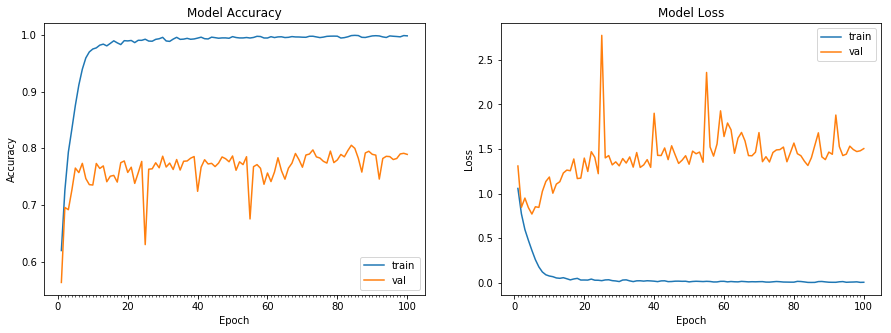

Accuracy on test data is: 78.91


In [26]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

import time
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))